In [2]:
# import sys
# import numpy, pandas, matplotlib, sklearn
# print(numpy.__version__)
# # import scipy
# # scipy.__version__
# import sklearn



The goal here is to leverage the partial dependence variance functions from the alibi package, to compute the feature interactions present in the diabetes dataset.

In [3]:
from alibi.explainers.pd_variance import PartialDependenceVariance  #the interaction computer
from sklearn.neural_network import MLPRegressor                     #the estimator
from sklearn.datasets import load_diabetes                          #the dataset
from sklearn.model_selection import train_test_split as ttsplit
import numpy as numpy
import pandas as pd

In [4]:
#Model training and evaluation
X, y = load_diabetes(return_X_y=True)   #load the dataset to X and y variables.

X_train, X_test, y_train, y_test = ttsplit(X, y)

model = MLPRegressor(max_iter=10000, random_state=42)   #initialization of the estimator with hyperparameters

model.fit(X_train, y_train)
print(f"Train set score = {model.score(X_train, y_train)}")     #compute the r2 score of the model on the train set
print(f"Test set score = {model.score(X_test, y_test)}")        #compute the r2 score of the model on the test set

Train set score = 0.5234977986520846
Test set score = 0.49100318898314266


In [5]:
#Computation of feature interaction

explainer = PartialDependenceVariance(predictor=model.predict, feature_names=load_diabetes().feature_names, target_names=["diseaseProgression"], verbose=True)

expInteraction = explainer.explain(X=X_train, method='interaction', grid_resolution=100)

  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 45/45 [02:32<00:00,  3.40s/it]


In [6]:
X = pd.DataFrame(X, columns=load_diabetes().feature_names)
X       #Show X for reference

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


array([[<Axes: title={'center': 'diseaseProgression'}, xlabel='Feature interaction'>]],
      dtype=object)

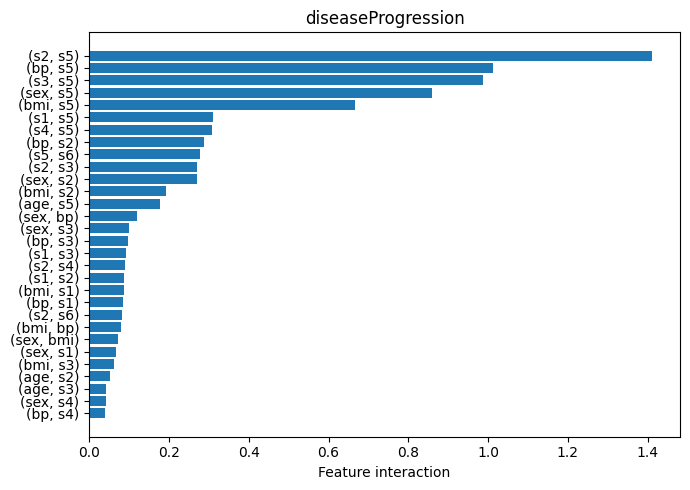

In [ ]:
#Visualization of the top 30 feature interactions.
from alibi.explainers.pd_variance import plot_pd_variance
plot_pd_variance(exp=expInteraction, features='all', summarise=True, sort=True,  fig_kw={'figwidth': 7, 'figheight': 5}, top_k=30)

In [10]:
#Computation of feature importances in dataset
expFeatureImportance = explainer.explain(X=X_train, method='importance', grid_resolution=100)


100%|██████████| 10/10 [00:01<00:00,  9.16it/s]


array([[<Axes: title={'center': 'diseaseProgression'}, xlabel='Feature importance'>]],
      dtype=object)

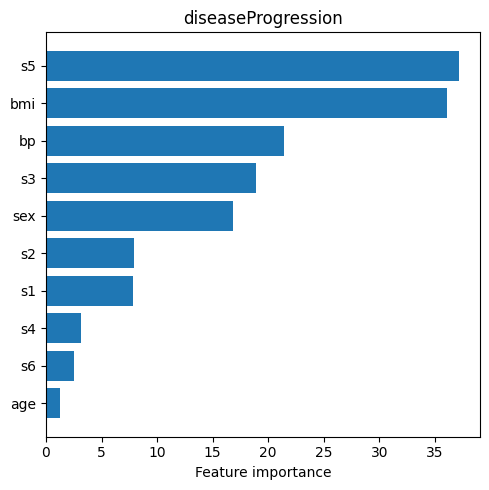

In [12]:
#Visualization of the feature importances.
plot_pd_variance(exp=expFeatureImportance, features='all', fig_kw={'figwidth': 5, 'figheight': 5})